# CNN with keras

In [103]:
!pip install tensorflow -q
!pip install pandas -q
!pip install sklearn -q
!

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import os
import shutil
import glob
import random
import shutil
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline




/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.w

In [ ]:
def confusionMatrix(orignal,prediction):
    cm=[[0,0],[0,0]]
    for i in range(0,len(orignal)):
        a= orignal[i]
        b=prediction[i]
        for x in [0,1]:
            for y in [0,1]:
                if a==x:
                    if b==y:
                        cm[x][y]+=1

    def plotCm(cm):
        pass


    plotCm(cm)
    return cm



# cm=confusionMatrix(test_labels,rounded_predictions)

In [5]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print(f"number of GPU available {len(physical_devices)}, named {physical_devices}")
tf.config.experimental.set_memory_growth(physical_devices[0],True)

number of GPU available 0, named []


2022-10-28 14:48:54.340322: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-28 14:48:54.340367: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DrPrateek): /proc/driver/nvidia/version does not exist


IndexError: list index out of range

In [3]:
# download Kaggle: Cat VS Dog Dataset

# !wget https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset?resource=download

# select images from dataset into train valid and test sets

In [30]:
dataFolderName='RawData'
if os.path.isdir(dataFolderName) is False:
    os.chdir("..")
print(os.getcwd())
import os
dir=os.path.dirname(os.path.abspath("."))
print(os.getcwd())
print(os.path.abspath('.'))
os.chdir(dataFolderName)
print(os.path.abspath('.'))

/home/prateek/Documents/01 Now AI ML/CNN-with-Keras/Part2
/home/prateek/Documents/01 Now AI ML/CNN-with-Keras/Part2
/home/prateek/Documents/01 Now AI ML/CNN-with-Keras/Part2
/home/prateek/Documents/01 Now AI ML/CNN-with-Keras/Part2/RawData


In [50]:



folders=['train','valid','test']
classification=['Dog','Cat']
print(os.path.basename(__name__))

#number of images in dataset
number={"train":500,"valid":100,"test":50}

trainingDataDir="../trainingData"
if os.path.isdir(trainingDataDir) is True:
    os.system(f"rm {trainingDataDir} -r")
if os.path.isdir(trainingDataDir) is False:
    for a in folders:
        for b in classification:
            temppath=f"{trainingDataDir}/{a}/{b}"
            print("creating " + temppath + " with " + str(number[a]) +" "+  b + "images" )
            if os.path.isdir(temppath) is False:
                os.makedirs(temppath)
            
            for img in random.sample(glob.glob(f"{b}/*.jpg"),number[a]):
                shutil.copy(img,temppath)

print('Operation Completed')
os.chdir("..")
print(os.getcwd())

__main__
creating ../trainingData/train/Dog with 500 Dogimages
creating ../trainingData/train/Cat with 500 Catimages
creating ../trainingData/valid/Dog with 100 Dogimages
creating ../trainingData/valid/Cat with 100 Catimages
creating ../trainingData/test/Dog with 50 Dogimages
creating ../trainingData/test/Cat with 50 Catimages
Operation Completed
/home/prateek/Documents/01 Now AI ML/CNN-with-Keras/Part2


In [54]:
train_path="./trainingData/train/"
test_path="./trainingData/test/"
valid_path="./trainingData/valid/"

# use Images

## convert images in to unified size and format

In [65]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(244,244),classes=classification,batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path,target_size=(244,244),classes=classification,batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(244,244),classes=classification,batch_size=10,shuffle=False)

assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes == valid_batches.num_classes==test_batches.num_classes==2


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [66]:
imgs,labels=next(train_batches)

In [117]:
from matplotlib.pyplot import axes


def plotImages(images_arr,labels):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax,l in zip(images_arr,axes,labels):
        ax.imshow(img)
        ax.axis('off')
        # ax.title(l)

    plt.tight_layout()
    plt.show()
    print(labels)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

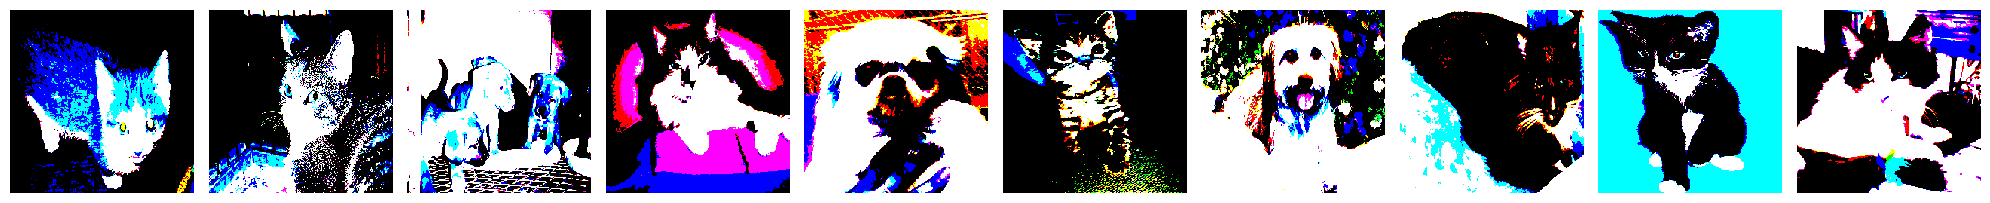

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [100]:
plotImages(imgs,labels)
print(labels)

## Build and Train CNN

In [105]:
from warnings import filters


model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(244,244,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 238144)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [106]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
 model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10


2022-10-28 16:29:15.812201: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 76206080 exceeds 10% of free system memory.
2022-10-28 16:29:16.347531: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 38103040 exceeds 10% of free system memory.
2022-10-28 16:29:16.542994: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 38103040 exceeds 10% of free system memory.
2022-10-28 16:29:16.837832: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34292736 exceeds 10% of free system memory.
2022-10-28 16:29:17.114741: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 38103040 exceeds 10% of free system memory.


100/100 - 63s - loss: 21.6029 - accuracy: 0.5680 - val_loss: 13.4778 - val_accuracy: 0.5550 - 63s/epoch - 630ms/step
Epoch 2/10
100/100 - 60s - loss: 4.1753 - accuracy: 0.7490 - val_loss: 5.1322 - val_accuracy: 0.6350 - 60s/epoch - 597ms/step
Epoch 3/10
100/100 - 59s - loss: 1.3347 - accuracy: 0.8410 - val_loss: 4.2024 - val_accuracy: 0.6350 - 59s/epoch - 591ms/step
Epoch 4/10
100/100 - 59s - loss: 0.5295 - accuracy: 0.9290 - val_loss: 5.2873 - val_accuracy: 0.6250 - 59s/epoch - 586ms/step
Epoch 5/10
100/100 - 58s - loss: 0.2526 - accuracy: 0.9570 - val_loss: 4.0151 - val_accuracy: 0.6300 - 58s/epoch - 585ms/step
Epoch 6/10
100/100 - 55s - loss: 0.0480 - accuracy: 0.9840 - val_loss: 3.9341 - val_accuracy: 0.6450 - 55s/epoch - 546ms/step
Epoch 7/10
100/100 - 56s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 4.7201 - val_accuracy: 0.6700 - 56s/epoch - 562ms/step
Epoch 8/10
100/100 - 53s - loss: 0.1154 - accuracy: 0.9700 - val_loss: 4.0569 - val_accuracy: 0.6050 - 53s/epoch - 534ms/step
E

In [1]:
model.save("savedModel/CatDocClassificationModel.h5")

NameError: name 'model' is not defined

In [115]:
train_batches[1][1][1]

array([0., 1.], dtype=float32)

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

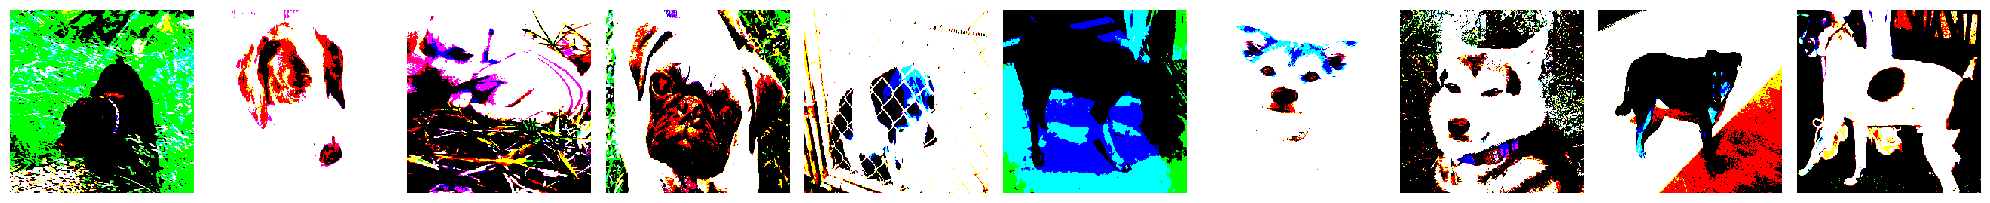

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [129]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs,test_labels)


In [130]:
test_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [131]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [152]:
predictions=model.predict(x=test_batches,verbose=0)
print(np.round(predictions))


[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [156]:
predictions_class=np.argmax(np.round(predictions),axis=-1)
print(predictions_class)
a=predictions_class
#map to label
for aa in range(0,len(a)):
    print(f"{aa} {classification[a[aa]]}")

[1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0]
0 Cat
1 Dog
2 Dog
3 Dog
4 Cat
5 Dog
6 Dog
7 Dog
8 Dog
9 Cat
10 Cat
11 Cat
12 Cat
13 Cat
14 Dog
15 Dog
16 Dog
17 Dog
18 Dog
19 Dog
20 Cat
21 Dog
22 Dog
23 Cat
24 Cat
25 Dog
26 Dog
27 Cat
28 Dog
29 Dog
30 Dog
31 Dog
32 Cat
33 Dog
34 Dog
35 Dog
36 Cat
37 Dog
38 Dog
39 Cat
40 Dog
41 Cat
42 Cat
43 Dog
44 Dog
45 Dog
46 Dog
47 Dog
48 Dog
49 Dog
50 Cat
51 Cat
52 Dog
53 Cat
54 Cat
55 Dog
56 Dog
57 Dog
58 Dog
59 Dog
60 Cat
61 Cat
62 Cat
63 Cat
64 Cat
65 Cat
66 Dog
67 Dog
68 Cat
69 Cat
70 Cat
71 Cat
72 Dog
73 Dog
74 Cat
75 Dog
76 Dog
77 Dog
78 Cat
79 Dog
80 Cat
81 Cat
82 Cat
83 Dog
84 Cat
85 Cat
86 Cat
87 Cat
88 Cat
89 Cat
90 Dog
91 Cat
92 Dog
93 Cat
94 Cat
95 Cat
96 Cat
97 Cat
98 Cat
99 Dog


In [158]:
# from sklearn.metrics import confusion_matrix


# cm=confusion_matrix(y_true=test_batches.classes,y_pred=predictions_class)
# cm

cm=confusionMatrix(test_batches,predictions_class)
cm

array([[34, 16],
       [18, 32]])